In [174]:
%matplotlib inline

from scipy import stats
from decimal import Decimal
import statsmodels.formula.api as sm
from scipy.interpolate import interp1d

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import gridspec


params = {
   'axes.labelsize': 18,
   'font.size': 24,
   'legend.fontsize': 18,
   'xtick.labelsize': 18,
   'ytick.labelsize': 18,
   'axes.titlesize':18,
   'text.usetex': True,
   'figure.figsize': [8, 6],
   'font.family':'serif',
   'font.serif':'Computer Modern Roman' 
   }
mpl.rcParams.update(params)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}\usepackage{bm}']

## Importing Data

In [175]:
ind = -1

data = np.genfromtxt('muon_data.data')

events = data[:,0][:ind]
times = (data[:,1][:ind]-data[0,1]*np.ones(len(events)))/(60*60)

In [176]:
times_n = times[np.where(events < 40000)]
events_n = events[np.where(events < 40000)]

## Determine if Spurious events are present?

/home/artemis/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


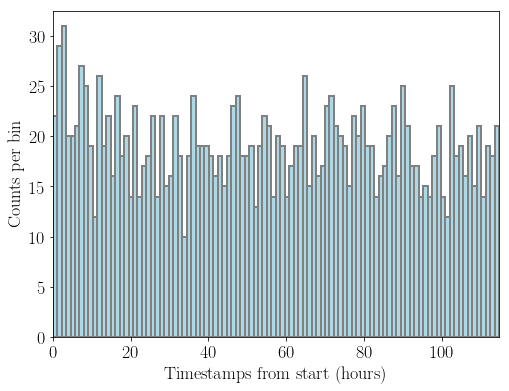

In [212]:
plt.hist(times_n,bins=100,color='lightblue',linewidth=2, histtype='bar', ec='grey')
plt.xlim(0,max(times_n))
plt.ylabel(r'Counts per bin')
plt.xlabel(r'Timestamps from start (hours)')
plt.show()

<b> Clearly no spurious events as no louder regions</b>

## Event Rate Plot

In [247]:
bin_width = 1000

bins = np.linspace(0,20000,20000/bin_width)

/home/artemis/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/artemis/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


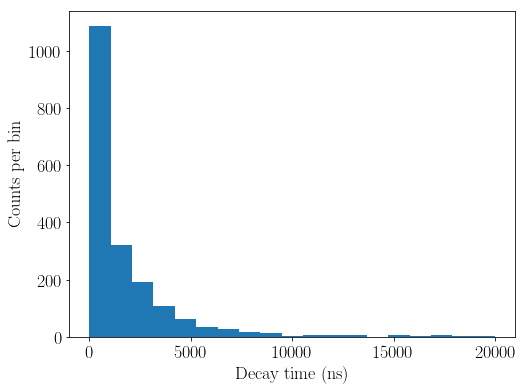

In [248]:
data_hist = plt.hist(events_n,bins=bins)
num_per_bin = data_hist[0]
bin_loc = data_hist[1][:-1]
plt.xlabel(r'Decay time (ns)')
plt.ylabel(r'Counts per bin')
plt.show()

/home/artemis/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


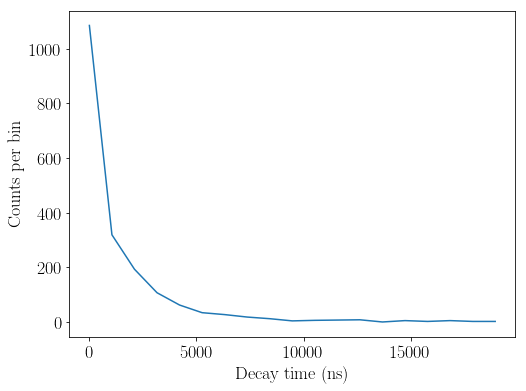

In [249]:
plt.plot(bin_loc,num_per_bin)
plt.xlabel(r'Decay time (ns)')
plt.ylabel(r'Counts per bin')
plt.show()

## Fitting

In [250]:
def decay(x,*popt):
    a, b, c = popt
    return a*np.exp(-1*x/b)+c

In [251]:
ind2 = 1

#num_per_bin_2 = num_per_bin[ind2:][num_per_bin[ind2:]<0.1] = 0.1

popt, pcov = curve_fit(decay, bin_loc[ind2:],
                       num_per_bin[ind2:], p0=[200.,1000,1.])
perr = np.sqrt(np.diag(pcov))

tot_num = np.sum(num_per_bin[ind2:])

print(popt)
print(perr)

[ 549.7044303  1919.07461094    3.37288514]
[ 9.27351246 38.71034885  0.9889329 ]


In [252]:
print('Lifetime of negative muon is: %0.4E +- %0.0E us' % (Decimal(popt[1]),Decimal(perr[1])))

Lifetime of negative muon is: 1.9191E+03 +- 4E+01 us


In [253]:
print(popt)

popt1 = popt+3*perr
poptn1 = popt-3*perr
print(popt1)

[ 549.7044303  1919.07461094    3.37288514]
[ 577.52496768 2035.2056575     6.33968382]


Text(0,0.5,'Number per bin')

/home/artemis/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


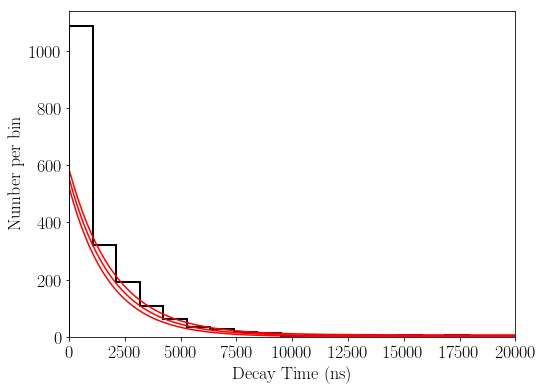

In [254]:
bins_2 = np.linspace(0,20000,200)

plt.hist(events_n,bins=bins,color='k',histtype='step',linewidth=2)
plt.plot(bins_2,decay(bins_2,*popt),color='r',linestyle='-')
plt.plot(bins_2,decay(bins_2,*popt1),color='r',linestyle='-')
plt.plot(bins_2,decay(bins_2,*poptn1),color='r',linestyle='-')
plt.xlim(min(bins),max(bins))
plt.xlabel(r'Decay Time (ns)')
plt.ylabel(r'Number per bin')

In [255]:
(2.043-popt[1]/1000)/(perr[1]/1000)

3.2013503553182483

In [256]:
perr

array([ 9.27351246, 38.71034885,  0.9889329 ])

## Instrumentation exercises

In [257]:
PMTtrace_data = np.genfromtxt('PMTtrace.csv',delimiter=',')

In [290]:
PMTtrace_time = PMTtrace_data[:,-2]
PMTtrace_volt = -PMTtrace_data[:,-1]

In [291]:
maximum_v = max(PMTtrace_volt)
print(maximum_v)

0.078


In [299]:
FWHM_t_array = PMTtrace_time[np.where(PMTtrace_volt-maximum_v/2 > 0.001)]
print((FWHM_t_array[-1]-FWHM_t_array[0])*1e9)

40.8


/home/artemis/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


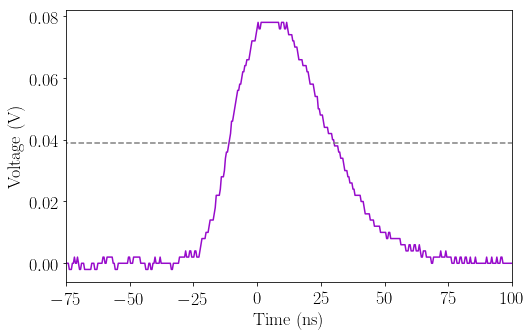

In [315]:
fig =plt.figure(figsize=(8,5))

plt.plot(PMTtrace_time*1e9,PMTtrace_volt,color=cm.gnuplot(90))
plt.xlim(-75,100)
plt.xlabel(r'Time (ns)')
plt.ylabel(r'Voltage (V)')
plt.plot([-1000,1000],[maximum_v/2,maximum_v/2],color='grey',linestyle='--')

plt.savefig('PMTvoltage.pdf',bbox_inches='tight')

In [300]:
PMTdis_data = np.genfromtxt('PMTdis.csv',delimiter=',')

In [301]:
PMTdis_time = PMTdis_data[:,-3]
PMTdis_volt = PMTdis_data[:,-2]
PMTdis_dis = PMTdis_data[:,-1]

/home/artemis/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


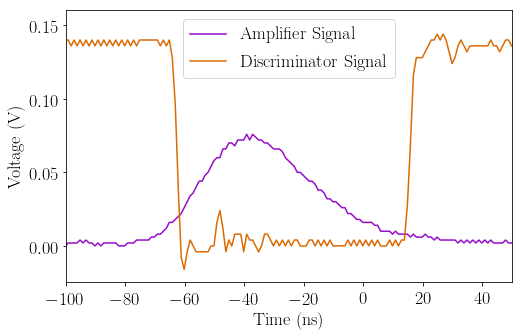

In [314]:
fig =plt.figure(figsize=(8,5))

plt.plot(PMTdis_time*1e9,PMTdis_volt,color=cm.gnuplot(90),label=r'Amplifier Signal')
plt.plot(PMTdis_time*1e9,PMTdis_dis,color=cm.gnuplot(190),label=r'Discriminator Signal')
plt.xlim(-100,50)
plt.legend(loc='best')

plt.xlabel(r'Time (ns)')
plt.ylabel(r'Voltage (V)')

plt.savefig('PMTdiscrim.pdf',bbox_inches='tight')

In [322]:
freq_data = np.genfromtxt('frequency2.csv',delimiter=',')

In [328]:
freq = freq_data[:-1,0]
u_freq = freq_data[:-1,1]

gain = freq_data[:-1,-2]
u_gain = freq_data[:-1,-1]

print(u_gain)

[0.20623948 0.14278118 0.10606602 0.10457213 0.10457213 0.10457213
 0.10457213 0.10457213 0.10457213 0.10457213 0.10457213 0.10457213
 0.10457213 0.10457213 0.10457213 0.10457213 0.10457213 0.10457213
 0.10311974 0.10311974 0.10311974 0.10311974 0.10311974 0.10311974
 0.10311974 0.10311974 0.10311974 0.10311974 0.10033272 0.09642365
 0.09769238 0.09642365 0.09642365 0.09518745 0.09280777 0.09054416
 0.09054416]


/home/artemis/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


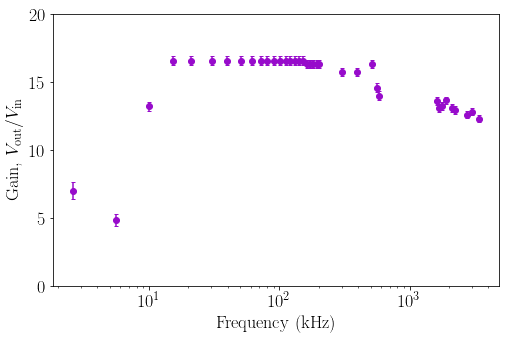

In [349]:
fig =plt.figure(figsize=(8,5))

plt.errorbar(freq,gain,xerr=3*u_freq/freq,yerr=3*u_gain,fmt='o',capsize=2,color=cm.gnuplot(90))
plt.ylim(0,20)

plt.xscale("log", nonposx='clip')
plt.xlabel(r'Frequency (kHz)')
plt.ylabel(r'Gain, $V_{\text{out}}/V_{\text{in}}$')
plt.savefig('frequency.pdf',bbox_inches='tight')

In [386]:
PMTplot3_data = np.genfromtxt('newfile3.csv',delimiter=',')

In [387]:
PMTplot3_time = PMTplot3_data[:,-3]
PMTplot3_volt = PMTplot3_data[:,-2]
PMTplot3_dis = PMTplot3_data[:,-1]

/home/artemis/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


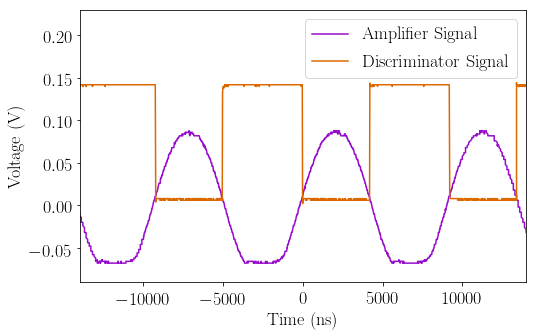

In [388]:
fig =plt.figure(figsize=(8,5))

plt.plot(PMTplot3_time*1e9,PMTplot3_volt,color=cm.gnuplot(90),label=r'Amplifier Signal')
plt.plot(PMTplot3_time*1e9,PMTplot3_dis,color=cm.gnuplot(190),label=r'Discriminator Signal')
plt.xlim(-14000,14000)
plt.ylim(-0.09,0.23)

plt.legend(loc='best')
plt.xlabel(r'Time (ns)')
plt.ylabel(r'Voltage (V)')
plt.savefig('sine_dis.pdf',bbox_inches='tight')

In [375]:
tc_data = np.genfromtxt('time_comp.csv',delimiter=',')

In [376]:
ccd = tc_data[:,0]
u_ccd = tc_data[:,1]

od = tc_data[:,2]
u_od = tc_data[:,3]

/home/artemis/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


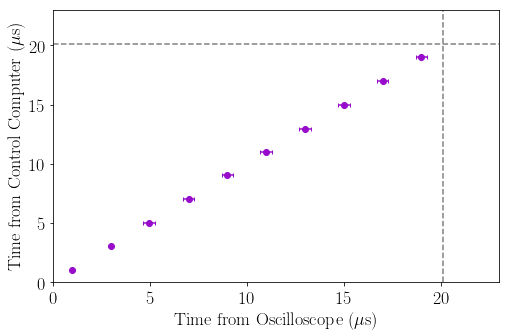

In [383]:
fig =plt.figure(figsize=(8,5))

plt.errorbar(od,ccd,xerr=3*u_od,yerr=3*u_ccd,fmt='o',capsize=2,color=cm.gnuplot(90))
plt.xlim(0,23)
plt.ylim(0,23)
plt.plot([20.1,20.1],[0,30],color='grey',linestyle='--')
plt.plot([0,30],[20.1,20.1],color='grey',linestyle='--')

plt.xlabel(r'Time from Oscilloscope ($\mu$s)')
plt.ylabel(r'Time from Control Computer ($\mu$s)')

plt.savefig('timing.pdf',bbox_inches='tight')

In [389]:
decay_peaks_data = np.genfromtxt('decay_peaks.csv',delimiter=',')

In [393]:
dp_time = decay_peaks_data[:,-3]
dp_volt = -decay_peaks_data[:,-2]

/home/artemis/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


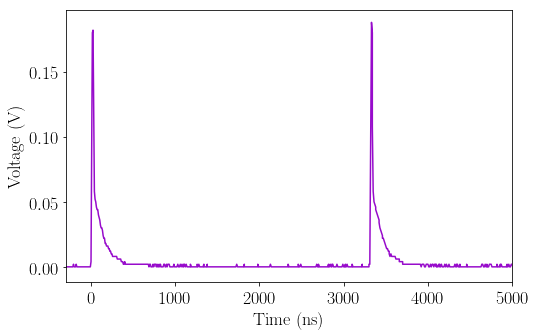

In [402]:
fig =plt.figure(figsize=(8,5))

plt.plot(dp_time*1e9,dp_volt,color=cm.gnuplot(90))
plt.xlim(-300,5000)
plt.xlabel(r'Time (ns)')
plt.ylabel(r'Voltage (V)')

plt.savefig('fake_decay.pdf',bbox_inches='tight')